# Building YOLOv3 Face Mask Detector with Darknet in the Cloud (GPU ENABLED)

# Step 1: Enabling GPU within the notebook
Enable GPU acceleration within the Colab notebook so that our YOLOv3 system will be able to process detections over 100 faster than CPU.

### Steps:

### i) Click **Edit** at top left of your notebook
### ii) Click **Notebook Settings** within dropdown
### iii) Under 'Hardware Accelerator' select **GPU** and then hit **Save**

The notebook should now have GPU enabled

# Step 2: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Total 15298 (delta 0), reused 0 (delta 0), pack-reused 15298
Receiving objects: 100% (15298/15298), 13.65 MiB | 15.86 MiB/s, done.
Resolving deltas: 100% (10397/10397), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [3]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# Step 3: Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We can grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-07-18 18:50:08--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  76.1MB/s    in 3.3s    

2021-07-18 18:50:12 (71.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [4]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Run Detections with Darknet and YOLOv3!
Darknet is now built and ready to run detections using YOLOv3 in the cloud! You can find out which sorts of classes the pretrained YOLOv3 weights can detect by clicking here. [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

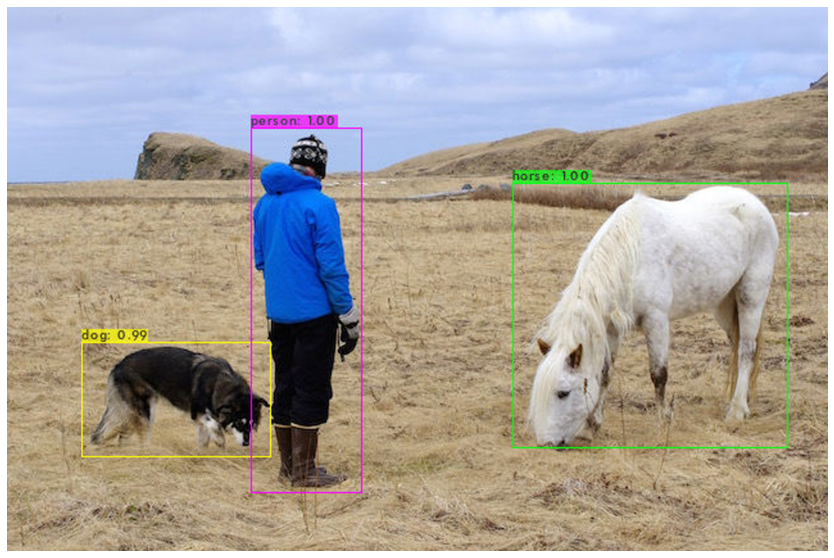

In [ ]:
# show image using helper function
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

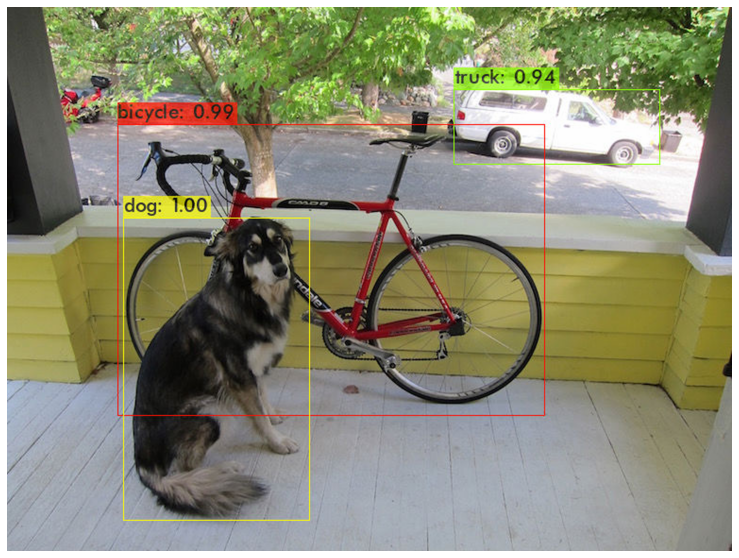

In [ ]:
# run another detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: ignored

# Step 5: Uploading Local or Google Drive Files to Use

### Method 1: Local Files


The image should save to the root directory so that we can access it from the darknet command by running.
```
!./darknet detect cfg/yolov3.cfg yolov3.weights ../<your image name>
```

In [ ]:
# upload an image to root directory
%cd ..
upload()

In [ ]:
# make sure you are in the darknet folder to run the detections command
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../IMG_6036.jpg
imShow('predictions.jpg')

### Method 2: Google Drive

Now we can run YOLOv3 with images from Google Drive using the darknet command:
```
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/<path to image>
```

In [5]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

/content
Mounted at /content/drive


[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64

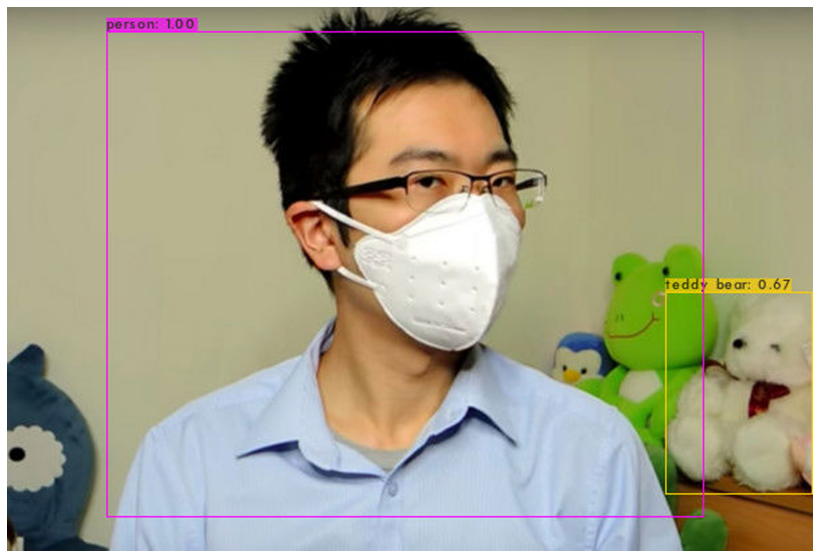

In [ ]:
# run darknet command with google drive image
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../maksssksksss6.png
imShow('predictions.jpg')

### Download Files to Local Machine or Google Drive from Cloud VM


In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that we can change what the image name is saved as
#!cp predictions.jpg /mydrive/images/detection1.jpg

# Training Custom YOLOv3 Fask Mask Detector in the Cloud

In order to create a custom YOLOv3 detector we need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional)


# Step 1: Moving the Face Mask Dataset into the Cloud VM
- The dataset in the drive data.zip is properly formatted for this algorithm.

- Use the train.txt file on drive and move it into darknet/data folder, it has the list of images to use for training. 
 - If encountering any errors while using train.txt in detection modify the genererate_train.py file in drive to change and reassign the path.

- rename the data folder to obj as it is in the generate_train.py script or else change 'obj' in the script to data to avoid any confusions.

Now copy in the data.zip and unzip it in cloud VM.

In [ ]:
#!cp data/data /content/darknet/data -r

In [ ]:
#!ls 

In [ ]:
# this is where my dataset zip is stored
!ls /content/drive/MyDrive/"SENG 474"/SENG474-Project

 backup				   ProgressReport_TaimurMohsinKunal.docx
 data.zip			  'raw data.zip'
'FaceMask_Detector YOLOv3.ipynb'   Resources.gdoc
 generate_train.py		   result_video.mp4
 maksssksksss6.png		   video_facemask.mp4
 obj.data.txt			   yolov3_custom.cfg
 obj.names.txt


In [6]:
# copy the .zip file into the root directory of cloud VM
!cp /content/drive/MyDrive/"SENG 474"/SENG474-Project/data.zip ../

In [ ]:
!pwd

/


In [7]:
%cd content/

[Errno 2] No such file or directory: 'content/'
/content


In [8]:
# unzip the zip file and its contents should now be in /darknet/data/obj (renaming the data folder to obj)
!unzip ../data.zip -d darknet/data/

Archive:  ../data.zip
   creating: darknet/data/data/
  inflating: darknet/data/__MACOSX/._data  
  inflating: darknet/data/data/maksssksksss628.txt  
  inflating: darknet/data/data/maksssksksss614.txt  
  inflating: darknet/data/data/maksssksksss172.txt  
  inflating: darknet/data/data/maksssksksss166.txt  
  inflating: darknet/data/data/maksssksksss600.txt  
  inflating: darknet/data/data/maksssksksss6.txt  
  inflating: darknet/data/data/maksssksksss833.txt  
  inflating: darknet/data/data/maksssksksss702.png  
  inflating: darknet/data/__MACOSX/data/._maksssksksss702.png  
  inflating: darknet/data/data/maksssksksss199.txt  
  inflating: darknet/data/data/maksssksksss827.txt  
  inflating: darknet/data/data/maksssksksss716.png  
  inflating: darknet/data/__MACOSX/data/._maksssksksss716.png  
  inflating: darknet/data/data/maksssksksss56.txt  
  inflating: darknet/data/data/maksssksksss42.txt  
  inflating: darknet/data/data/maksssksksss358.txt  
  inflating: darknet/data/data/makss

# Step 2: Configuring Files for Training
This step involves properly configuring the custom .cfg file, obj.data.txt, obj.names.txt and train.txt file.

 - You may need to adjust the file paths depending on current directory or change your current directory.

## i) Cfg File
Copy over the yolov3.cfg to edit by running the cell below.

In [ ]:
!ls

In [ ]:
# download cfg to google drive and change its name
#!cp darknet/cfg/yolov3.cfg drive/MyDrive/"SENG 474"/SENG474-Project/yolov3_custom.cfg
### Do not run this, I have copied it already in the project folder with proper configuration

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
#download('cfg/yolov3.cfg')

If you need to edit the .cfg file:

Have **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Rest of the changes to the cfg are based on how many classes we are training the detector on. 3 classes in our case.

- max_batches = 2000 * (no. of classes) = 6000
- steps = (80% of max_batches), (90% of max_batches) = 4800, 5400
- filters = (no. of classes + 5) * 3 = 24

**Note:** I set **max_batches = 6000**, **steps = 4800, 5400**, I changed the **classes = 3** in the three YOLO layers and **filters = 24** in the three convolutional layers before the YOLO layers. 

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if we run into any memory issues.

3 classes are: mask_wearing, mask_not_wearing, and mask_wearing_incorrectly


In [ ]:
%cd /content

/content


In [ ]:
!pwd

/content/darknet


In [10]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp drive/MyDrive/"SENG 474"/SENG474-Project/yolov3_custom.cfg darknet/cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [ ]:
!ls

## ii) obj.names.txt and obj.data.txt 
- I have uploaded two files in drive, "obj.names.txt" and "obj.data.txt". 
- obj.names has all the classes of our dataset listed.
- obj.data has no. of classes, train.txt's path, test.txt's path (optional), obj.names' path and the path where backup of training weights will be stored as the training is done.
- The backup of weights of the model will be saved throughout the training, I initially created a backup folder in the shared project folder, but ran into some errors and had to save the weights to non-shared path.

In [9]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/drive/MyDrive/"SENG 474"/SENG474-Project/obj.names.txt /content/darknet/data
!cp /content/drive/MyDrive/"SENG 474"/SENG474-Project/obj.data.txt  /content/darknet/data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

## iii) Generating train.txt
I have used generate_train.py script to create train.txt listing the training dataset, but if you run into errors depending on your directory location, you may have to change the script according to your directory location.

If making changes to the script, remember to copy the script to cloud VM and make changes only in cloud VM instead of the drive folder.

In [11]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /content/drive/MyDrive/"SENG 474"/SENG474-Project/generate_train.py /content/darknet

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()

Now we simply run the python script to do all the work for us.

In [ ]:
#!cp ./data/train.txt /content/darknet/data/

In [ ]:
!pwd

/content


In [12]:
!python darknet/generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls /content/darknet/data/

# Step 3: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps the custom object detector to be way more accurate and not have to train as long. We don't have to use these weights but, it will help our model be accurate way faster.

In [13]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-08-13 00:11:02--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-08-13 00:11:02--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  67.7MB/s    in 2.3s    

2021-08-13 00:11:05 (67.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 4: Train the Custom Face Mask Detector
Run the following command. (dont_show flag stops a chart from popping up since cloud can't open images on the spot)
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```
The training could take serveral hours, took me more than 9 hours with our dataset.

To avoid getting timedout, use the following script in the console window.

```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
It will click the screen every 10 minutes so that you don't get kicked off for being idle


In [ ]:
#!chmod +x /content/darknet

In [ ]:
!pwd
!ls

In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
# train the custom detector
%cd /content/darknet
!/content/darknet/darknet detector train /content/darknet/data/obj.data.txt /content/darknet/cfg/yolov3_custom.cfg ../darknet53.conv.74 -dont_show

/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.

You can observe a chart of how the model did throughout the training process by running the below command. It shows a chart of average loss vs. iterations. For the model to be 'accurate' we would aim for a loss under 2.

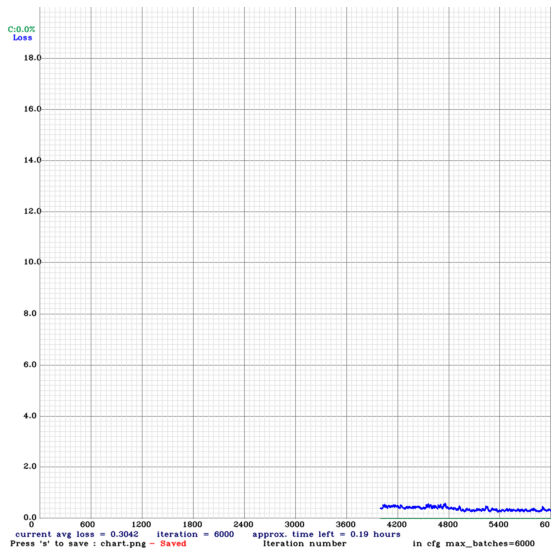

In [ ]:
imShow('chart.png')

If for some reason we get an error or the Colab goes idle during training, you have not lost your weights! Every 1000 iterations a weights file called **yolov3_custom_last.weights** is saved to the specified backup folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [ ]:
!/content/darknet/darknet detector train /content/darknet/data/obj.data.txt /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolov3_custom_4000.weights -dont_show

Streaming output truncated to the last 5000 lines.
Loaded: 0.000146 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.839148), count: 1, class_loss = 0.009239, iou_loss = 0.017198, total_loss = 0.026437 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.872704), count: 21, class_loss = 0.257130, iou_loss = 0.300446, total_loss = 0.557576 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000033, iou_loss = 0.000000, total_loss = 0.000033 
 total_bbox = 513576, rewritten_bbox = 0.051015 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.851554), count: 3, class_loss = 0.000490, iou_loss = 0.059754, total_loss = 0.060244 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.821078), count: 3, class_loss = 0.000020, iou_loss = 0.042291, total_loss = 0.042311 
v3 (mse loss, Normalizer: (iou:

# Step 5: Run the Face Mask Detector!

In [14]:
# need to set our custom cfg to test mode 
%cd /content/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [ ]:
!ls /data

labels


The lable folder in darknet/data needs to be copied to the root directory otherwise it does not generate the labels for detections for some reason.

In [15]:
!cp /content/darknet/data/labels ../ -r

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

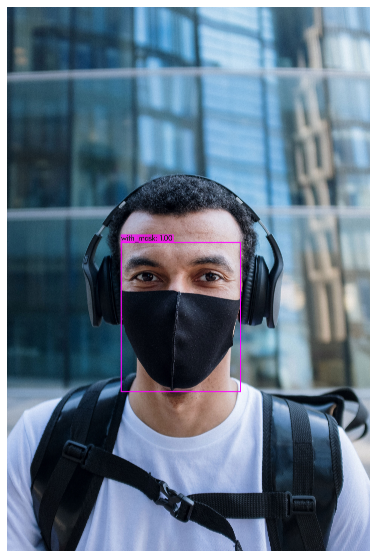

In [16]:
# run the custom detector with this command (upload an image to your google drive or VM to test, thresh flag sets accuracy that detection must be in order to show it)

!/content/darknet/darknet detector test /content/darknet/data/obj.data.txt /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolov3_custom_final.weights /content/facemask.jpg -thresh 0.3
imShow('predictions.jpg')

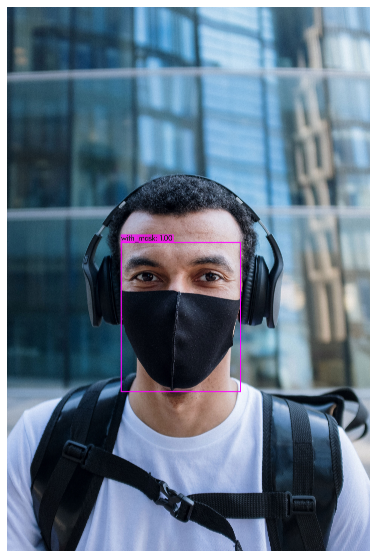

In [17]:
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

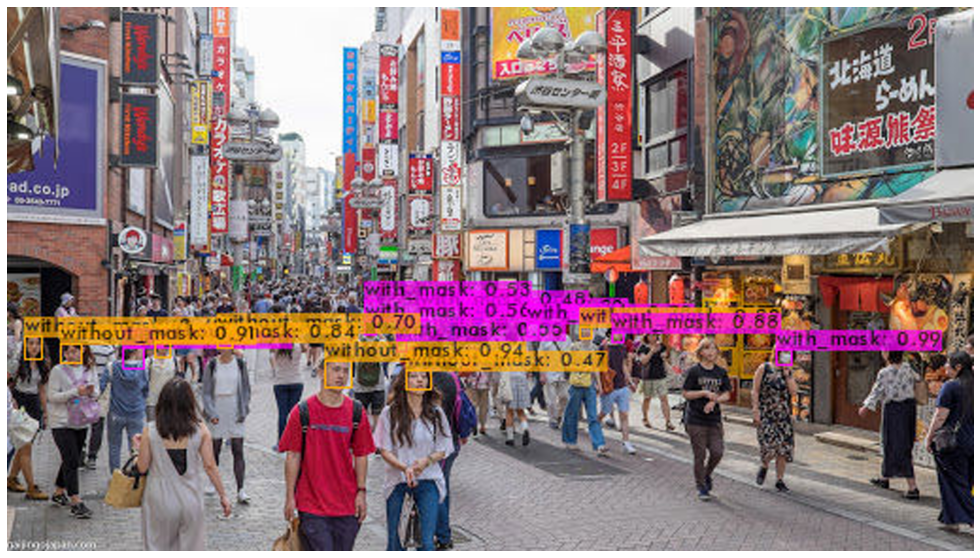

In [ ]:
!/content/darknet/darknet detector test /content/darknet/data/obj.data.txt /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolov3_custom_final.weights /content/unnamed.jpg -thresh 0.3
imShow('predictions.jpg')

We can pick the training again after changing the .cfg file to adjust for training. I trained the model for 6000 complete iterations before running these detections.

In [ ]:
!content/darknet/darknet detector train /content/darknet/data/obj.data.txt /content/darknet/cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

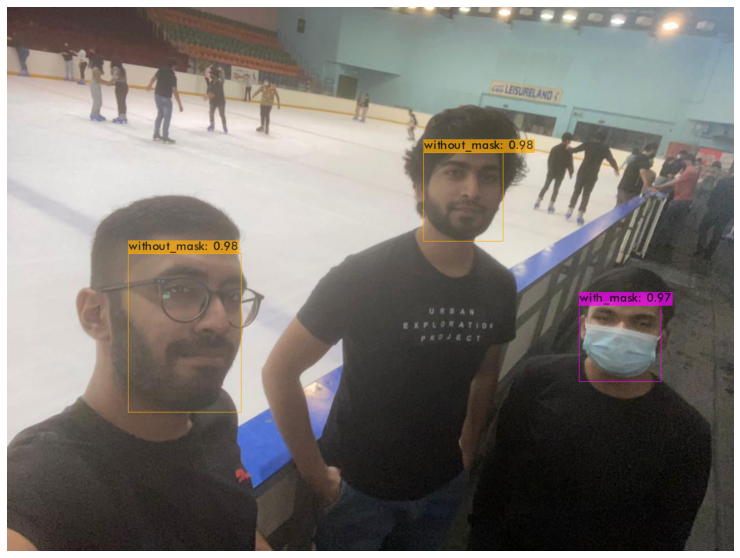

In [ ]:
!/content/darknet/darknet detector test /content/darknet/data/obj.data.txt /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolov3_custom_final.weights /content/jeff.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

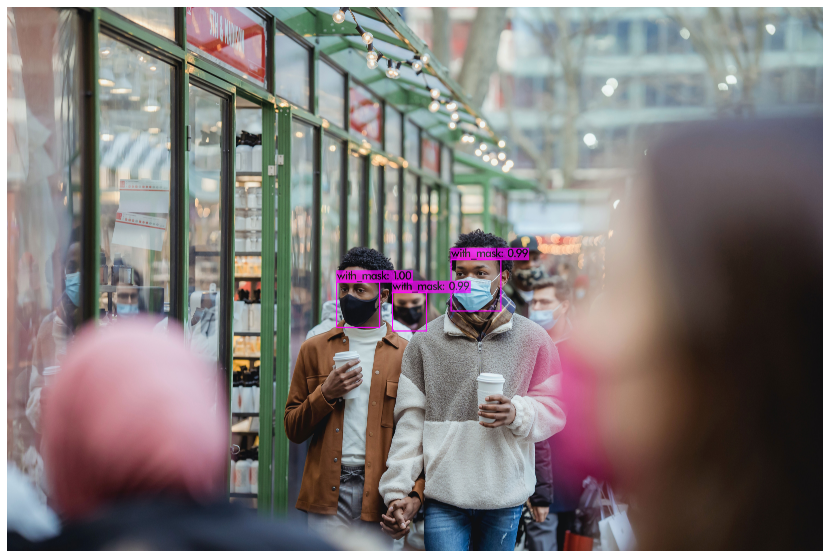

In [18]:
!/content/darknet/darknet detector test /content/darknet/data/obj.data.txt /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolov3_custom_final.weights /content/mask1.jpg -thresh 0.3
imShow('predictions.jpg')

### Detecting Face Mask in a video file:

In [ ]:
# run the custom detector with this command (upload an image to your google drive or VM to test, thresh flag sets accuracy that detection must be in order to show it)

!/content/darknet/darknet detector demo /content/darknet/data/obj.data.txt /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/"Copy of yolov3_custom_final.weights" /content/drive/MyDrive/"SENG 474"/SENG474-Project/video_facemask.mp4 -dont_show -out_filename result_video.mp4


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer

In [ ]:
!cp /content/darknet/result_video.mp4 /content/drive/MyDrive/"SENG 474"/SENG474-Project

Running webcam in colab requires some API calls and is a complicated process. Run the program detect_by_camera.py to detect Face Mask using webcam.

# End!

References:

https://pjreddie.com/darknet/yolo/